In [134]:
import os
import sys
import urllib.request

data = []

def search_api(keyword):
    client_id = "qZWsU4PyjE8vOJ9WNFN5"
    client_secret = "D4lzqXbKlC"
    encText = urllib.parse.quote(keyword)
    url = "https://openapi.naver.com/v1/search/news?query=" + encText # json 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res = response_body.decode('utf-8')
        print(type(res))
        print(res)
        # data[0]에 JSON 문자열이 저장됨
        data.append(res)
    else:
        print("Error Code:" + rescode)
        return 0
    
search_api('증권 MZ')

<class 'str'>
{
"lastBuildDate": "Thu, 26 Aug 2021 00:01:45 +0900",
"total": 4367,
"start": 1,
"display": 10,
"items": [
{
"title": "[8월26일자] 비즈니스포스트 아침의 주요기사",
"originallink": "https://www.businesspost.co.kr/BP?command=article_view&num=247266",
"link": "https://www.businesspost.co.kr/BP?command=article_view&num=247266",
"description": "한문일 <b>MZ</b>세대 깊게 ● GS 품에 안긴 휴젤, 손지훈 재신임받아 중국 미국 유럽 진출 완성할까 ● 대우건설... IBK투자<b>증권</b> 최대실적 순항, 서병기 서학개미도 잡는다 ● [오늘Who] 현대홈쇼핑 현대HCN 매각 끝내, 정지선 인수... ",
"pubDate": "Wed, 25 Aug 2021 21:18:00 +0900"

},
{
"title": "&quot;디지털 가치창출&quot;... DGB금융, 카카오페이와 제휴",
"originallink": "http://www.meconomynews.com/news/articleView.html?idxno=57293",
"link": "http://www.meconomynews.com/news/articleView.html?idxno=57293",
"description": "강화해 <b>MZ</b>세대(밀레니얼+Z세대) 등 금융소비자들의 자산관리서비스 수준을 향상시킬 계획이다. 마이데이터... 하이투자<b>증권</b>, 생명, 캐피탈 그리고 최근 인수한 자산관리 특화 핀테크사 뉴지스탁 등 계열사별 특성에... ",
"pubDate": "Wed, 25 Aug 2021 17:50:00 +0900"

},
{
"title": "'우주'에 꽂힌 삼성 금융사들, 보험도 <b>증권</b>도 관심 이유

In [135]:
import json
import pandas as pd # pandas 사용하여 dataframe에 저장하기

# JSON디코딩
dt = json.loads(data[0])


# Dictionary 데이터 체크
# print(dt['items'])

# dataframe에 저장
title = []
link = []
description = []
pubDate = []

for item in dt['items']:
    #print(item['title'])
    title.append(item['title'])
    link.append(item['link'])
    description.append(item['description'])
    pubDate.append(item['pubDate'])

# Dataframe으로 
df = pd.DataFrame({
    'title': title
    , 'link': link
    , 'description': description
    , 'pubDate': pubDate
})


In [139]:
df

,title,link,description,pubDate
0,[8월26일자] 비즈니스포스트 아침의 주요기사,https://www.businesspost.co.kr/BP?command=arti...,"한문일 <b>MZ</b>세대 깊게 ● GS 품에 안긴 휴젤, 손지훈 재신임받아 중국...","Wed, 25 Aug 2021 21:18:00 +0900"
1,"&quot;디지털 가치창출&quot;... DGB금융, 카카오페이와 제휴",http://www.meconomynews.com/news/articleView.h...,강화해 <b>MZ</b>세대(밀레니얼+Z세대) 등 금융소비자들의 자산관리서비스 수준...,"Wed, 25 Aug 2021 17:50:00 +0900"
2,"'우주'에 꽂힌 삼성 금융사들, 보험도 <b>증권</b>도 관심 이유는",http://www.updownnews.co.kr/news/articleView.h...,금융권에선 삼성생명 우주 광고에 대해 재미를 중시하는 밀레니얼+Z(<b>MZ</b>...,"Wed, 25 Aug 2021 17:44:00 +0900"
3,'적자 커진' SSG닷컴·마켓컬리…'상장 성공' 위한 차별화 전략은?,http://www.opinionnews.co.kr/news/articleView....,<b>증권</b>가는 SSG닷컴의 성장률 둔화에 대해 ▲지난해 코로나19에 따른 이...,"Wed, 25 Aug 2021 17:28:00 +0900"
4,<b>증권</b>업계 디지털 자산관리에 힘…온라인 PB 소통 창구도 다변화,http://biz.newdaily.co.kr/site/data/html/2021/...,최근에는 <b>MZ</b>세대뿐 아니라 4050세대 등 신규 고객들을 대상으로 체험...,"Wed, 25 Aug 2021 15:26:00 +0900"
5,SKT 'T우주'로 100조 구독시장 돌격....&quot;35년 공력 보여주겠다&...,https://www.techm.kr/news/articleView.html?idx...,Z세대(<b>MZ</b>세대)가 주소비층으로 급부상하고 있어 전망이 밝다&quot;...,"Wed, 25 Aug 2021 15:10:00 +0900"
6,"브랜드 디지털 플랫폼, NH투자<b>증권</b> '투자가 문화로'",http://www.discoverynews.kr/news/articleView.h...,"NH투자<b>증권</b>은 브랜드 디지털 플랫폼 '투자가 문화로'를 공개했다, 투...","Wed, 25 Aug 2021 14:42:00 +0900"
7,"IPO 앞둔 카카오페이, 앱 설치 700만 돌파...국민 핀테크로 거듭난 비결은",https://www.techm.kr/news/articleView.html?idx...,실제 카카오페이는 '재미'를 가미한 서비스로 주 고객층인 <b>MZ</b>세대를 공...,"Wed, 25 Aug 2021 14:36:00 +0900"
8,[단독]<b>MZ</b> 주식 빚투족 상반기만 5만명…'반대매매' 위험도 커졌다,https://news.naver.com/main/read.naver?mode=LS...,김상봉 한성대 경제학과 교수 역시 &quot;<b>MZ</b>세대(밀레니얼+Z세대)...,"Wed, 25 Aug 2021 11:24:00 +0900"
9,[실전재테크]앱테크 열풍…금융사·<b>MZ</b>세대 니즈 '찰떡',https://news.naver.com/main/read.naver?mode=LS...,스마트폰을 잘 다루는 <b>MZ</b>(밀레니얼+Z)세대 사이에서 애플리케이션(앱)...,"Wed, 25 Aug 2021 11:20:00 +0900"


# 연습

In [6]:
import os
import sys
import urllib.request

data = []

def search_api(keyword):
    client_id = "qZWsU4PyjE8vOJ9WNFN5"
    client_secret = "D4lzqXbKlC"
    encText = urllib.parse.quote(keyword)
    url = "https://openapi.naver.com/v1/search/news?query=" + encText # json 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res = response_body.decode('utf-8')
        print(type(res))
        print(res)
        # data[0]에 JSON 문자열이 저장됨
        data.append(res)
    else:
        print("Error Code:" + rescode)
        return 0
    
search_api('증권 MZ')

<class 'str'>
{
"lastBuildDate": "Thu, 26 Aug 2021 00:45:27 +0900",
"total": 4367,
"start": 1,
"display": 10,
"items": [
{
"title": "[8월26일자] 비즈니스포스트 아침의 주요기사",
"originallink": "https://www.businesspost.co.kr/BP?command=article_view&num=247266",
"link": "https://www.businesspost.co.kr/BP?command=article_view&num=247266",
"description": "한문일 <b>MZ</b>세대 깊게 ● GS 품에 안긴 휴젤, 손지훈 재신임받아 중국 미국 유럽 진출 완성할까 ● 대우건설... IBK투자<b>증권</b> 최대실적 순항, 서병기 서학개미도 잡는다 ● [오늘Who] 현대홈쇼핑 현대HCN 매각 끝내, 정지선 인수... ",
"pubDate": "Wed, 25 Aug 2021 21:18:00 +0900"

},
{
"title": "&quot;디지털 가치창출&quot;... DGB금융, 카카오페이와 제휴",
"originallink": "http://www.meconomynews.com/news/articleView.html?idxno=57293",
"link": "http://www.meconomynews.com/news/articleView.html?idxno=57293",
"description": "강화해 <b>MZ</b>세대(밀레니얼+Z세대) 등 금융소비자들의 자산관리서비스 수준을 향상시킬 계획이다. 마이데이터... 하이투자<b>증권</b>, 생명, 캐피탈 그리고 최근 인수한 자산관리 특화 핀테크사 뉴지스탁 등 계열사별 특성에... ",
"pubDate": "Wed, 25 Aug 2021 17:50:00 +0900"

},
{
"title": "'우주'에 꽂힌 삼성 금융사들, 보험도 <b>증권</b>도 관심 이유

In [7]:
import requests 
client_id = "qZWsU4PyjE8vOJ9WNFN5"
client_secret = "D4lzqXbKlC"
keyword = '증권 mz' 
url = 'https://openapi.naver.com/v1/search/news.json' 
headers = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret} 
# https://redfox.tistory.com 
newslist = []
for i in range(10):
    params = {'query':keyword, 'display':100, 'start':1+(100*i), 'sort':'sim'} 
    r = requests.get(url, params = params, headers = headers) 
    j = r.json() 
    newslist.append(j['items'])
# print(newslist)



In [9]:
import json
import pandas as pd # pandas 사용하여 dataframe에 저장하기

# JSON디코딩
dt = json.loads(data[0])

# Dictionary 데이터 체크
# print(dt['items'])

# dataframe에 저장
title = []
link = []
description = []
pubDate = []
for i in range(len(newslist)):
    for item in newslist[i]:
        #print(item['title'])
        title.append(item['title'])
        link.append(item['link'])
        description.append(item['description'])
        pubDate.append(item['pubDate'])

# Dataframe으로 
df = pd.DataFrame({
    'title': title
    , 'link': link
    , 'description': description
    , 'pubDate': pubDate
})


In [10]:
df['title']

0             NH투자<b>증권</b>, <b>MZ</b>세대 '투자 놀이터' 온라인 개장
1        NH투자<b>증권</b>, <b>MZ</b>세대 겨냥한 '투자가 문화로' 플랫폼 오픈
2      NH투자<b>증권</b>, <b>MZ</b>세대 겨냥 ‘투자가 문화로’ 브랜드 디지...
3                   NH투자<b>증권</b>, <b>MZ</b>세대 겨냥 플랫폼 오픈
4      NH투자<b>증권</b>, <b>MZ</b>세대 겨냥 ‘투자가 문화로’ 브랜드 디지...
                             ...                        
995     '롤린' 저작권 5개월새 22배↑···<b>MZ</b>세대 사로잡은 新투자처[이노머니]
996        &quot;엄지족 <b>MZ</b>세대 잡아라&quot; 한화생명은 유튜브 온에어
997    한화생명, 유튜브 통해 <b>MZ</b>세대와 소통 강화...&quot;브랜드 팬덤...
998               한화생명, 유튜브 통해 '엄지족' <b>MZ</b>세대 사로잡기 나서
999           한화생명 유튜브, &quot;엄지족 <b>MZ</b>세대를 잡아라&quot;
Name: title, Length: 1000, dtype: object

## description마다 증권들어간 애들 찾아야함.
-> link에서 본문을 볼 수 있고 description은 네이버api에서 자체적으로 요약된 글임.

-> title에서 봐야겠네?

mau순위인 키움,nh,삼성,미래에셋,한국투자,kb

mz세대 겨냥한 신한,토스,삼성,nh 

10개의 검색어를 넣고 빈도수를 보자


In [11]:
dict_word = {
    '키움':0
    , '키움증권':0 # 0,1
    , 'NH':0 # 2,3,4
    , 'NH투자':0
    , 'NH투자증권':0
    , '삼성':0 # 5,6
    , '삼성증권':0
    , '미래에셋':0 #7, 8
    , '미래에셋증권':0
    , '한국투자':0 #9, 10
    , '한국투자증권':0
    , 'KB':0 # 11, 12
    , 'KB증권':0
    , '신한':0 #13, 14
    , '신한증권':0
    , '토스':0 # 15,16
    , '토스증권':0
}
from collections import defaultdict
dict_check = defaultdict(bool)
# dict_check = {
#     '키움':False
#     , '키움증권':False # 0,1
#     , 'nh':False # 2,3,4
#     , 'nh투자':False
#     , 'nh투자증권':False
#     , '삼성':False # 5,6
#     , '삼성증권':False
#     , '미래에셋':False #7, 8
#     , '미래에셋증권':False
#     , '한국투자':False #9, 10
#     , '한국투자증권':False
#     , 'kb':False # 11, 12
#     , 'kb증권':False
#     , '신한':False #13, 14
#     , '신한증권':False
#     , '토스':False # 15,16
#     , '토스증권':False
# }

In [12]:
def find_word_in_str(word):
    # 1.키움
    if word =='키움' or word=='키움증권':
        if dict_check['키움'] or dict_check['키움증권']:
            return False
    # 2. NH
    elif word =='NH' or word=='NH투자' or word=='NH투자증권':
        if dict_check['NH'] or dict_check['NH투자'] or dict_check['NH투자증권']:
            return False
    # 3.삼성
    elif word =='삼성' or word=='삼성증권':
        if dict_check['삼성'] or dict_check['삼성증권']:
            return False
    # 4.미래에셋
    elif word =='미래에셋' or word=='미래에셋증권':
        if dict_check['미래에셋'] or dict_check['미래에셋증권']:
            return False
    # 5.한국투자
    elif word =='한국투자' or word=='한국투자증권':
        if dict_check['한국투자'] or dict_check['한국투자증권']:
            return False
    # 6. KB
    elif word =='KB' or word=='KB증권':
        if dict_check['KB'] or dict_check['KB증권']:
            return False
    # 7. 신한
    elif word =='신한' or word=='신한증권':
        if dict_check['신한'] or dict_check['신한증권']:
            return False
    # 8. 토스
    elif word =='토스' or word=='토스증권':
        if dict_check['토스'] or dict_check['토스증권']:
            return False
        
    return True

In [13]:
df

,title,link,description,pubDate
0,"NH투자<b>증권</b>, <b>MZ</b>세대 '투자 놀이터' 온라인 개장",https://news.naver.com/main/read.naver?mode=LS...,회사에 따르면 투자가 문화로는 디지털상의 NH투자<b>증권</b>의 브랜딩 공간으로...,"Mon, 23 Aug 2021 15:28:00 +0900"
1,"NH투자<b>증권</b>, <b>MZ</b>세대 겨냥한 '투자가 문화로' 플랫폼 오픈",https://news.naver.com/main/read.naver?mode=LS...,NH투자<b>증권</b>이 <b>MZ</b>세대를 겨냥한 플랫폼 '투자가 문화로'를...,"Mon, 23 Aug 2021 15:14:00 +0900"
2,"NH투자<b>증권</b>, <b>MZ</b>세대 겨냥 ‘투자가 문화로’ 브랜드 디지...",https://www.etoday.co.kr/news/view/2055837,NH투자<b>증권</b> 관계자는 “언택트 시대에 <b>MZ</b>세대들에게 투자 ...,"Mon, 23 Aug 2021 10:44:00 +0900"
3,"NH투자<b>증권</b>, <b>MZ</b>세대 겨냥 플랫폼 오픈",https://news.naver.com/main/read.naver?mode=LS...,NH투자<b>증권</b>(005940)이 <b>MZ</b>세대(1980년대 초∼20...,"Mon, 23 Aug 2021 12:07:00 +0900"
4,"NH투자<b>증권</b>, <b>MZ</b>세대 겨냥 ‘투자가 문화로’ 브랜드 디지...",https://news.naver.com/main/read.naver?mode=LS...,NH투자<b>증권</b> 관계자는 “언택트 시대에 <b>MZ</b>세대들에게 투자 ...,"Mon, 23 Aug 2021 10:43:00 +0900"
...,...,...,...,...
995,'롤린' 저작권 5개월새 22배↑···<b>MZ</b>세대 사로잡은 新투자처[이노머니],https://news.naver.com/main/read.naver?mode=LS...,뮤직카우가 <b>MZ</b>세대 사이에서 '덕질테크'로 부각되면서 지난 3일 170...,"Sat, 05 Jun 2021 07:00:00 +0900"
996,&quot;엄지족 <b>MZ</b>세대 잡아라&quot; 한화생명은 유튜브 온에어,http://www.smedaily.co.kr/news/articleView.htm...,"또한 한화생명은 한화금융계열사(생명, 손해보험, 투자<b>증권</b>, 자산운용, ...","Wed, 26 May 2021 11:12:00 +0900"
997,"한화생명, 유튜브 통해 <b>MZ</b>세대와 소통 강화...&quot;브랜드 팬덤...",http://www.efnews.co.kr/news/articleView.html?...,"한화금융계열사(생명, 손해보험, 투자<b>증권</b>, 자산운용, 저축은행)와 공동...","Wed, 26 May 2021 11:10:00 +0900"
998,"한화생명, 유튜브 통해 '엄지족' <b>MZ</b>세대 사로잡기 나서",http://www.sentv.co.kr/news/view/594632,"또한 한화생명은 한화금융계열사(생명, 손해보험, 투자<b>증권</b>, 자산운용, ...","Wed, 26 May 2021 11:02:00 +0900"


In [14]:
# for each_items in df['title']:
#     each_items_title = re.findall(r'\w+', each_items)
#     print(each_items_title)
print(len(df))

1000


In [15]:
import re
for i in range(len(df)):
    each_items_title = re.findall(r'\w+', df['title'][i])
    each_items_description = re.findall(r'\w+', df['description'][i])
    
    # 단어 수 체크
    for word in dict_word:
        # title에서 찾기
        if not dict_check[word] and word in each_items_title:
            # 중복된 것 방지.
            if find_word_in_str(word):
                dict_word[word] += 1
                dict_check[word] = True
        # description에서 찾기
        if not dict_check[word] and word in each_items_description:
            # 중복된 것 방지.
            if find_word_in_str(word):
                dict_word[word] += 1
                dict_check[word] = True
        # check초기화
        dict_check = defaultdict(bool)
print(dict_word)
print(dict_check)

{'키움': 23, '키움증권': 0, 'NH': 23, 'NH투자': 208, 'NH투자증권': 1, '삼성': 80, '삼성증권': 0, '미래에셋': 140, '미래에셋증권': 2, '한국투자': 64, '한국투자증권': 0, 'KB': 36, 'KB증권': 0, '신한': 1, '신한증권': 0, '토스': 40, '토스증권': 0}
defaultdict(<class 'bool'>, {})


In [16]:
df.to_csv('뉴스 클롤링 결과 1000개_from0526to0826.csv', encoding="utf-8-sig", header=True,index=False)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
dict_word

{'키움': 23,
 '키움증권': 0,
 'NH': 23,
 'NH투자': 208,
 'NH투자증권': 1,
 '삼성': 80,
 '삼성증권': 0,
 '미래에셋': 140,
 '미래에셋증권': 2,
 '한국투자': 64,
 '한국투자증권': 0,
 'KB': 36,
 'KB증권': 0,
 '신한': 1,
 '신한증권': 0,
 '토스': 40,
 '토스증권': 0}

In [38]:

NH투자증권 = 240
미래에셋증권 = 142
삼성증권 =79
한국투자증권 = 64
토스증권 = 41
KB증권 = 37
키움증권 = 23
신한증권 = 1
my_dict = {"NH투자증권": 240
           , "미래에셋증권": 142
           , "삼성증권": 79
           , "한국투자증권": 64
           , "토스증권" : 41
           , "KB증권" : 37
           , "키움증권" : 23
           , "신한증권" : 1
          }
my_dict = pd.DataFrame({
    "Name": ["NH투자증권","미래에셋증권", "삼성증권", "한국투자증권", "토스증권", "KB증권", "키움증권", "신한증권"]
    , "Frequency":[240, 142, 79, 64, 41, 37, 23, 1]
})
my_dict


,Name,Frequency
0,NH투자증권,240
1,미래에셋증권,142
2,삼성증권,79
3,한국투자증권,64
4,토스증권,41
5,KB증권,37
6,키움증권,23
7,신한증권,1


In [43]:
my_dict['Name']

0    NH투자증권
1    미래에셋증권
2      삼성증권
3    한국투자증권
4      토스증권
5      KB증권
6      키움증권
7      신한증권
Name: Name, dtype: object

In [52]:
import numpy as np
tt = list(np.array(my_dict['Name'].tolist()))
print(tt)

['NH투자증권', '미래에셋증권', '삼성증권', '한국투자증권', '토스증권', 'KB증권', '키움증권', '신한증권']


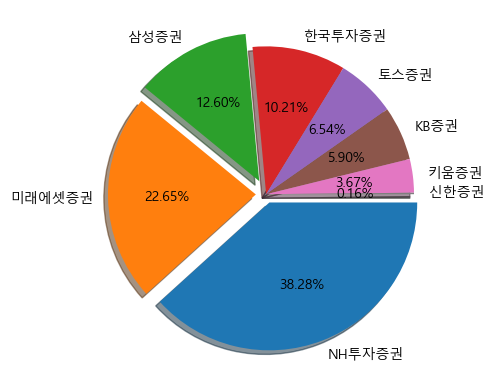

In [60]:
import matplotlib.pyplot as plt
import numpy as np

p_df_key = list(np.array(my_dict['Name'].tolist()))
p_df_value = list(np.array(my_dict['Frequency'].tolist()))

# 한글폰트 출력
plt.rcParams['font.family']='Malgun Gothic'
# 부분 라벨
exe_name = p_df_key
exe_result = my_dict.Frequency
explode_value = (0.06,0.07,0.1,0,0,0,0,0)
# 강조 시퀀스 데이터
plt.pie(p_df_value, labels=p_df_key, autopct='%0.2f%%',
       explode=explode_value, shadow=True, counterclock=False)

plt.show()